Preprocessing Data

In [38]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [39]:
X = np.load('Data/X_train.npy')
y = np.load('Data/Y_train.npy')
print("X.shape =", X.shape, "y.shape =", y.shape)

X.shape = (700, 6) y.shape = (700,)


In [40]:
X_scaled = StandardScaler().fit_transform(X)
print("means:", np.round(X_scaled.mean(axis=0), 4))
print("stds: ", np.round(X_scaled.std(axis=0), 4))

means: [-0. -0.  0.  0.  0. -0.]
stds:  [1. 1. 1. 1. 1. 1.]


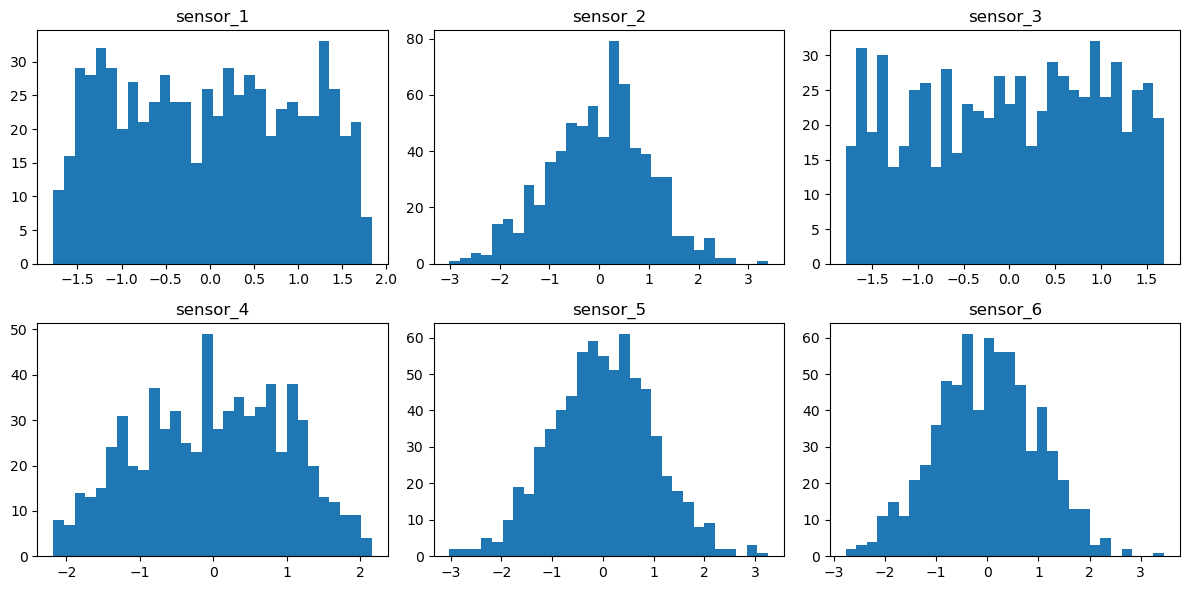

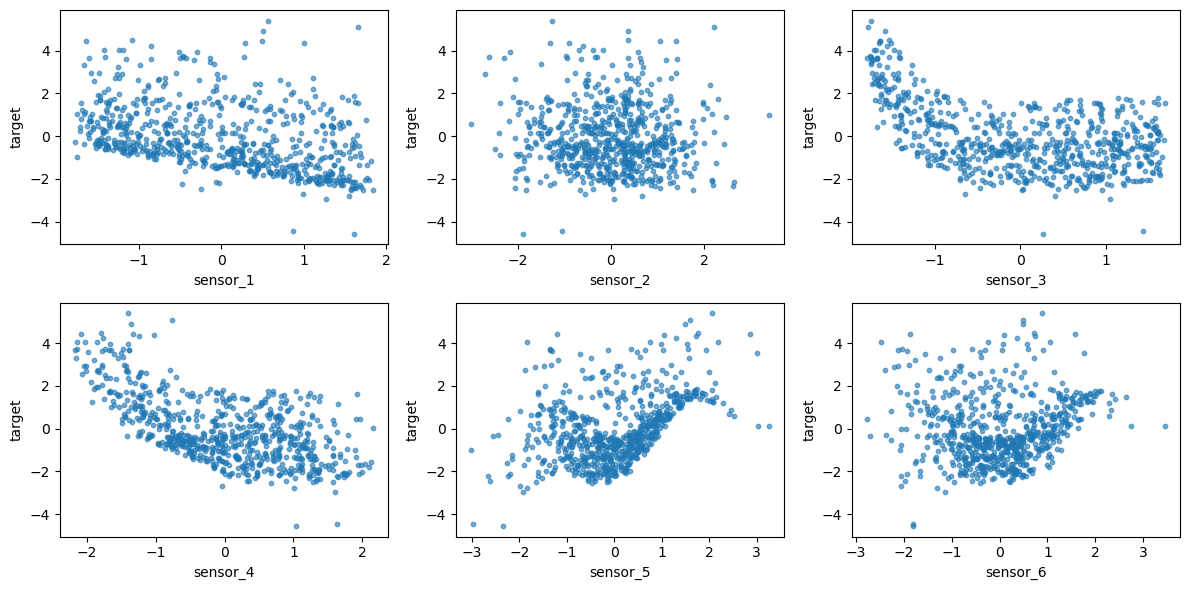

In [41]:
import matplotlib.pyplot as plt

# histograms
fig, axes = plt.subplots(2, 3, figsize=(12,6))
for i, ax in enumerate(axes.ravel()):
    ax.hist(X_scaled[:, i], bins=30)
    ax.set_title(f"sensor_{i+1}")
plt.tight_layout()
plt.show()

# scatter each feature vs target
fig, axes = plt.subplots(2, 3, figsize=(12,6))
for i, ax in enumerate(axes.ravel()):
    ax.scatter(X_scaled[:, i], y, s=10, alpha=0.6)
    ax.set_xlabel(f'sensor_{i+1}')
    ax.set_ylabel('target')
plt.tight_layout()
plt.show()


Feature vs target correlations (sorted by abs):
sensor_4    0.615151
sensor_3    0.498314
sensor_5    0.405033
sensor_1    0.402298
sensor_6    0.094479
sensor_2    0.050452
Name: target, dtype: float64


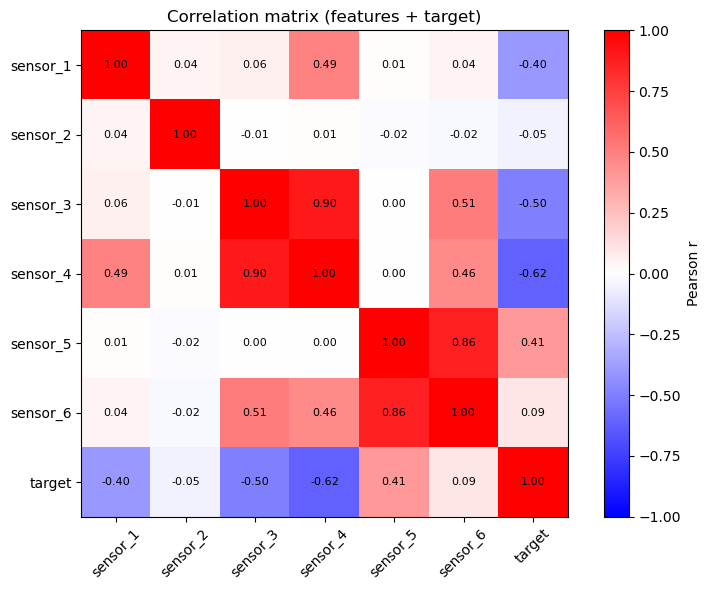

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

colnames = [f"sensor_{i+1}" for i in range(X.shape[1])]
df = pd.DataFrame(X_scaled, columns=colnames)
df['target'] = y

corr = df.corr()                     # Pearson correlation matrix
feat_target_corr = corr['target'].drop('target')  # feature vs target
print("Feature vs target correlations (sorted by abs):")
print(feat_target_corr.abs().sort_values(ascending=False))

# Visualize correlation matrix (with numeric annotations)
plt.figure(figsize=(8,6))
plt.imshow(corr, vmin=-1, vmax=1, cmap='bwr', interpolation='nearest')
plt.colorbar(label='Pearson r')
ticks = np.arange(len(corr))
plt.xticks(ticks, corr.columns, rotation=45)
plt.yticks(ticks, corr.columns)
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center', fontsize=8)
plt.title("Correlation matrix (features + target)")
plt.tight_layout()
plt.show()


In [43]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.01, random_state=42)  # try 0.005..0.02
is_outlier_iso = iso.fit_predict(X_scaled) == -1
print("IsolationForest outliers:", is_outlier_iso.sum())


IsolationForest outliers: 7


In [44]:
from sklearn.model_selection import train_test_split

# Keep only non-outliers
mask = ~is_outlier_iso          # True = good samples
X_clean = X[mask]
y_clean = y[mask]

# Train/test split on cleaned data
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

print("After removing outliers:")
print("X_clean shape:", X_clean.shape)
print("y_clean shape:", y_clean.shape)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


After removing outliers:
X_clean shape: (693, 6)
y_clean shape: (693,)
Train shape: (554, 6)
Test shape: (139, 6)


In [45]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.metrics import r2_score

for degree in range(1, 11):
    # Polynomial expansion
    polynomial_model = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = polynomial_model.fit_transform(X_train)
    X_test_poly  = polynomial_model.transform(X_test)
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict
    y_train_pred = model.predict(X_train_poly)
    y_test_pred  = model.predict(X_test_poly)
    
    # Compute R^2
    r2_train = r2_score(y_train, y_train_pred)
    r2_test  = r2_score(y_test, y_test_pred)
    
    print(f"Degree {degree}: Train R^2 = {r2_train:.4f}, Test R^2 = {r2_test:.4f}")


Degree 1: Train R^2 = 0.5689, Test R^2 = 0.4630
Degree 2: Train R^2 = 0.8541, Test R^2 = 0.8209
Degree 3: Train R^2 = 0.9019, Test R^2 = 0.8364
Degree 4: Train R^2 = 0.9899, Test R^2 = 0.9130
Degree 5: Train R^2 = 0.9971, Test R^2 = 0.6750
Degree 6: Train R^2 = 0.9994, Test R^2 = -0.4777
Degree 7: Train R^2 = 0.9960, Test R^2 = -49.5740
Degree 8: Train R^2 = 0.9892, Test R^2 = -222.2534
Degree 9: Train R^2 = 0.9743, Test R^2 = -218.9138
Degree 10: Train R^2 = 0.9613, Test R^2 = -762.7136
